<a href="https://colab.research.google.com/github/Katedral99/Aula_Alura/blob/main/Aula_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+3" color="yellow">
`CRIANDO UM SISTEMA PARA BUSCA EM DOCUMENTOS USANDO EMBEDDINGS E A GEMINI API`
</font>
<font size="+2" color="blue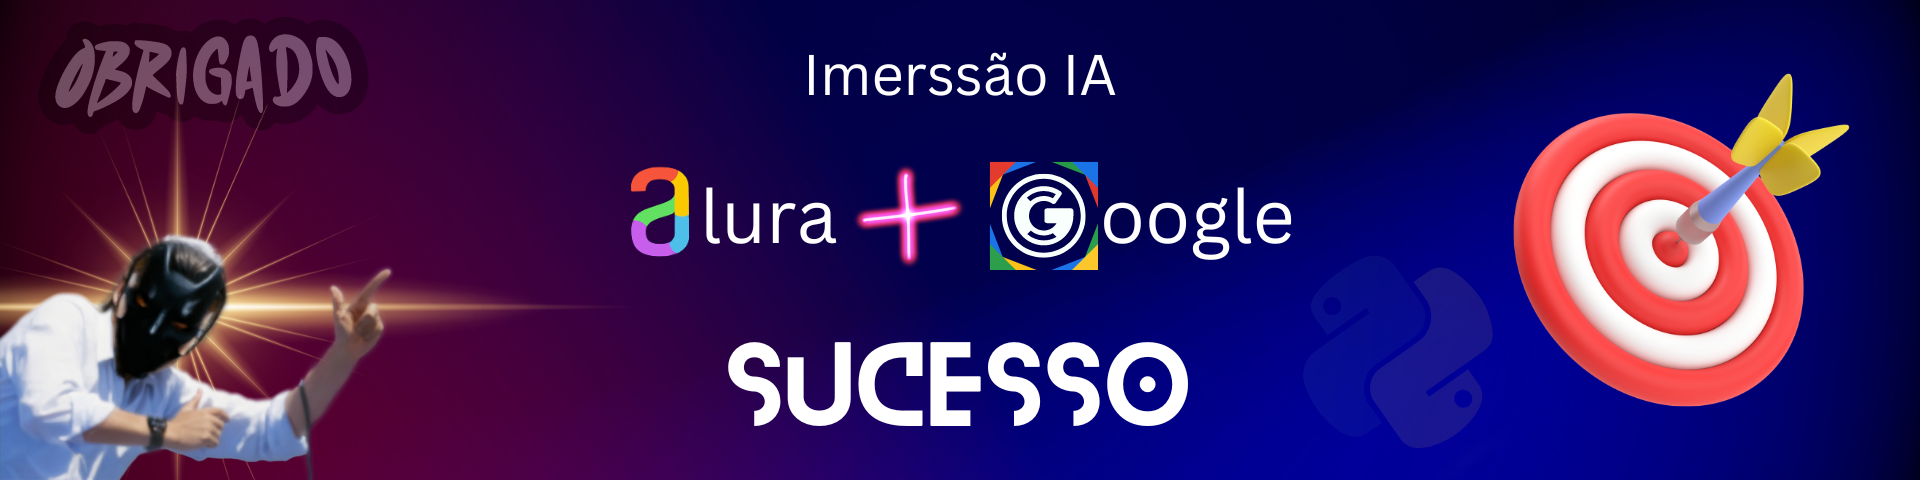">
`Gerando pronpts criativos`
</font>

In [39]:
#O comando serve para instalar ou atualizar a biblioteca Google Generative AI no seu ambiente Python.
!pip install -q -u google-generativeai:


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [3]:
#NumPy é uma biblioteca essencial para computação científica em Python. Ela oferece suporte a arrays multidimensionais de alto desempenho e uma vasta coleção de funções matemáticas para operar nesses arrays.
import numpy as np
#Pandas é uma biblioteca Python poderosa e flexível para análise e manipulação de dados. Ela oferece estruturas de dados de alto desempenho, como DataFrames e Series, que facilitam a leitura, limpeza, transformação e análise de dados tabulares.
import pandas as pd
import google.generativeai as genai
from google.colab import userdata
api_key = userdata.get('CHAVE_SECRETA')
genai.configure(api_key=api_key)

In [40]:
#O comando é um laço em Python que percorre a lista de modelos disponíveis na biblioteca genai (Google Generative AI).
for m in genai.list_models():
#"embedContent" não é um termo padrão na área de tecnologia. Para te ajudar a entender melhor, preciso de mais contexto semântico.
 if 'embedContent' in m.supported_generation_methods:
  print(m.name)

models/embedding-001
models/text-embedding-004


In [41]:
#Exemplos de embeddings
title = 'Dominando a Arte da Engenharia de Prompt: Extraindo o Máximo de um Chatbot'
sample_text = ('Este guia prático explora o universo da engenharia de prompt, desvendando suas nuances e revelando as melhores práticas para extrair o máximo de um chatbot.''\n' 'Abordaremos desde os conceitos básicos até técnicas avançadas, com exemplos concretos e dicas valiosas para aprimorar suas habilidades.''\n' '**Conteúdo**' '\n'
    '**Introdução à Engenharia de Prompt:** Desvendando o poder das palavras na interação humano-máquina O que é Engenharia de Prompt? Sua importância na era dos chatbots e IA conversacional.'
    '**Fundamentos da Construção de Prompts:** Eficazes: Dominando a arte da formulação precisa. Clareza e concisão: evitando ambiguidades e direcionando o chatbot. Especificidade: delineando o contexto e as expectativas desejadas. Formatação e estrutura: utilizando marcadores, formatação de texto e linguagem natural para melhor compreensão.'
    '**Dominando as Técnicas Avançadas:** Explorando as nuances e possibilidades da engenharia de prompt.''\n''Prompt Chaining: Encadeando prompts para construir conversas complexas e obter respostas mais completas.''\n''Few-Shot Learning: Treinando o chatbot com poucos exemplos para guiá-lo na direção desejada.' '\n''Zero-Shot Learning: Explorando a capacidade do chatbot de generalizar e responder a prompts nunca vistos antes.'
    '**Estudos de Caso Detalhados:** Analisando exemplos reais de prompts eficazes em diferentes áreas.' '\n''Geração de conteúdo criativo: prompts para escrita de poemas, roteiros e textos originais.' '\n''Tradução e adaptação: prompts para tradução precisa e adaptação cultural de textos.' '\n''Análise de dados e insights: prompts para extrair informações relevantes de conjuntos de dados.'
    '**Desafios e Tendências Futuras:** Explorando as fronteiras da engenharia de prompt e as inovações que moldarão o futuro.' '\n' 'Refinando a precisão e controlando o viés em chatbots.' '\n' 'Personalizando a experiência do usuário com prompts adaptáveis.' '\n' 'Integrando prompts com outras tecnologias, como aprendizado por reforço e modelos multimodais.'
    '**Conclusão:** Dominar a arte da engenharia de prompt é essencial para desbloquear o verdadeiro potencial dos chatbots. Com este guia, você estará equipado com o conhecimento e as ferramentas necessárias para criar prompts eficazes, moldando interações mais inteligentes, intuitivas e personalizadas')
embeddings = genai.embed_content(model='models/embedding-001',
                                 content = sample_text,
                                 title=title,
                                 task_type='RETRIEVAL_DOCUMENT')
print(embeddings)

{'embedding': [0.032905456, -0.05506067, 0.00081279885, -0.011506033, 0.05505439, 0.013089625, -0.048000503, -0.02450085, 0.008345922, 0.04301807, 0.025465427, 0.0049221846, -0.030322852, -0.048240487, 0.00083073776, -0.032761876, -0.006740206, 0.014070969, 5.1795632e-05, -0.031183373, -0.03219574, -0.009956174, 0.016709892, -0.01072146, -0.0036755784, -0.006620253, 0.028480906, -0.06099466, -0.02025185, 0.014028324, -0.014329105, 0.04142425, -0.020743193, -0.033931907, -0.033396736, -0.05722218, 0.009983833, 0.051198673, 0.0038851618, 0.015861314, -0.037011303, 0.0031601477, -0.009160828, -0.01401035, -0.014155074, -0.039510556, 0.032781336, 0.034437284, 0.052032653, -0.07463605, -0.010429586, 0.00037628546, 0.06740045, 0.0046544145, -0.002972309, -0.003930022, 0.07906286, 0.025823096, -0.00020080004, 0.0013037573, -0.006034535, 0.016221358, -0.014487251, 0.03765393, -0.014395966, -0.026598403, -0.028850868, -0.007309348, 0.064183764, -0.00044240695, 0.013031118, 0.023254413, -0.02362

In [42]:
#Lista de documentos que saram buscados
DOCUMENT1 = {
    'Título': '**Exemplos de Prompts para Marketing**',
    'Conteúdo': 'Escreva uma introdução envolvente para um artigo de blog sobre [tema] que prenda a atenção do leitor.''\n''Liste 5 ideias de tópicos para posts de mídia social que gerem engajamento sobre [produto/serviço].''\n''Crie um roteiro para um vídeo curto e cativante que apresente [marca/produto] e seus benefícios.''\n''E-mail Marketing:''\n''Escreva um assunto de e-mail irresistível para uma campanha de [promoção/evento].''\n''Redija um e-mail convidativo para dar as boas-vindas a novos assinantes da newsletter, destacando [benefícios/ofertas].''\n''Crie uma sequência de 3 e-mails automatizados para nutrir leads interessados em [produto/serviço].''\n''Pesquisa de Mercado:''\n''Formule 5 perguntas claras e concisas para uma pesquisa online com o objetivo de entender [necessidade/preferência do público].''\n''Analise os resultados da pesquisa sobre [tema] e identifique as principais tendências e insights.''\n''Escreva um relatório resumido com as conclusões da pesquisa sobre [tema] e suas implicações para o marketing.''\n''Brainstorming:''\n''Liste 10 ideias inovadoras para campanhas de marketing que promovam [produto/serviço] para [público-alvo].''\n''Explore 5 abordagens criativas para aumentar o conhecimento da marca [marca/produto] utilizando mídias digitais.''\n''Identifique 3 novas oportunidades de mercado para [produto/serviço] considerando as tendências atuais.''\n''**Lembre-se de adaptar os prompts acima à sua necessidade específica, inserindo informações relevantes sobre sua marca, produto, serviço e público-alvo. Use esses exemplos como ponto de partida para explorar o potencial da engenharia de prompt em suas estratégias de marketing.**'}

DOCUMENT2 = {
    'Título': '**Despertando a Criatividade Visual: Prompts para Geração de Imagens no Gemini**',
    'Conteúdo': 'Explore o potencial artístico do Gemini com prompts inspiradores que darão vida às suas ideias visuais. Use estes exemplos como guia para gerar imagens originais e cativantes:''\n''**Conceitos Abstratos:**''\n''Uma explosão de cores vibrantes representando a energia da música. A solidão retratada em tons de azul e cinza, com um único ponto de luz. A alegria da dança expressa em formas fluidas e dinâmicas.''\n''**Cenas Imaginárias:**''\n''Uma cidade futurista flutuando nas nuvens, com arquitetura orgânica e veículos voadores. Um dragão colossal adormecido em um vale verdejante, coberto por flores multicoloridas. Um portal mágico conectando dois mundos distintos, com cores vibrantes e elementos surrealistas.''\n''**Retratos Estilizados:**''\n''Retrato de uma mulher com cabelos longos e esvoaçantes, estilo Art Déco, em tons pastel.''\n''Um retrato cyberpunk de um homem com implantes cibernéticos, em cores neon vibrantes.''\n''Retrato de uma criança com um olhar sonhador, estilo aquarela, com cores suaves e delicadas.''\n''**Natureza Reinventada:**''\n''Uma floresta encantada com árvores bioluminescentes e cogumelos gigantes, em tons de azul e roxo.''\n''Um deserto surreal com dunas de areia rosa e céu verde-água, com elementos geométricos abstratos.''\n''Um oceano tempestuoso com ondas gigantes quebrando em forma de espiral, em tons de cinza e azul escuro.''\n'}

DOCUMENT3 = {
    'Título': '**Despertando a Imaginação Infantil: Prompts Encantadores para Conteúdo Criativo**',
    'Conteúdo': '**Crie histórias, músicas e atividades que inspirem a criatividade e o aprendizado das crianças com estes prompts mágicos:**''\n''**Contos de Fadas Modernos:**''\n''Escreva uma história sobre uma princesa que prefere construir robôs a usar vestidos brilhantes.''\n''Imagine um mundo onde os animais falam e crie uma aventura com um gato travesso e um esquilo inventor.''\n''Conte a história de um grupo de brinquedos que ganham vida quando ninguém está olhando e embarcam em uma missão secreta.''\n''**Músicas Animadas:**''\n''Crie uma música sobre a importância de lavar as mãos antes das refeições, com ritmo contagiante e letra fácil de aprender.''\n''Imagine uma canção sobre os planetas do sistema solar, com versos educativos e melodia que inspire as crianças a explorar o universo.''\n''**Atividades Criativas:**''\n''Desenhe um mapa do tesouro escondido em um jardim mágico, com pistas desafiadoras e elementos encantadores para colorir.''\n''Crie um jogo de tabuleiro com tema espacial, com desafios educativos sobre astronomia e missões interplanetárias.''\n''Imagine um fantoche de meia com personalidade divertida e crie um roteiro para um pequeno teatro de fantoches com ensinamentos sobre amizade.''\n''**Temas Educativos:**''\n''Explique o ciclo da água de forma lúdica e criativa, utilizando personagens infantis e linguagem fácil de entender.''\n''Crie uma história sobre a importância da reciclagem, com animais que ensinam as crianças a cuidar do planeta.''\n''Imagine um diálogo divertido entre diferentes alimentos, destacando a importância de uma alimentação saudável e balanceada.''\n''**Lembre-se de usar linguagem clara, imagery vibrante e personagens cativantes para envolver a atenção dos pequenos. Explore diferentes estilos, formatos e temas para despertar a imaginação e o aprendizado de forma divertida e enriquecedora.**'}

DOCUMENT4 = {
    'Título' : '**A estrutura ideal para prompts no Gemini**',
    'Conteúdo': 'A estrutura ideal para prompts no Gemini depende da tarefa que você deseja realizar e do tipo de resposta que espera. No entanto, algumas práticas recomendadas podem te ajudar a elaborar prompts mais eficazes:**''\n''**1. Clareza e Concisão:**''\n''Seja claro e direto no que você quer que o modelo faça.''\n''Evite instruções ambíguas ou muito complexas.''\n''Use frases curtas e linguagem simples.''\n''**Exemplo:**''\n''**Escreva um poema curto sobre a primavera.**''\n''**2. Contexto Detalhado:**''\n''Forneça informações suficientes para o modelo entender o contexto da sua solicitação.''\np''Detalhes sobre o público-alvo, tom de voz, estilo e formato desejados podem ser muito úteis.''\n''**Exemplo:**''\np''**Escreva um artigo para um blog de culinária sobre os benefícios de cozinhar com ingredientes frescos. O artigo deve ser informativo e encorajador, com um tom de voz amigável e acolhedor.**''\n''**Incluir exemplos de outputs desejáveis pode ajudar o modelo a entender melhor suas expectativas.**''\n''Use a formatação adequada para destacar os exemplos.**''\n''**Exemplo:**''\n''Crie um slogan para uma marca de café que transmita energia e positividade. **Exemplos:** * Acorde para a vida!''\n''Comece o dia com energia''\n''O combustível para seus sonhos!''\n''**Formatação:**''\n''**Utilize elementos de formatação para destacar as partes importantes do prompt.''\n''Use negrito, itálico, marcadores, títulos, etc. para organizar a informação.**''\n''**Exemplo:**''\n''## Crie um roteiro para um vídeo curto no YouTube:''\n''**Tema:** Dicas para cuidar de plantas em apartamento.''\n''**Público-alvo:** Jovens adultos que moram em grandes cidades.''\n''**Tom de voz:** Divertido e informal.''\n''**Duração:** Máximo de 1 minuto.''\n''**Lembre-se que a experimentação é fundamental. Teste diferentes estruturas de prompts e analise os resultados para descobrir o que funciona melhor para suas necessidades.A medida que você se familiariza com o Gemini, poderá usar recursos avançados como prompts encadeados e exemplos de few-shot learning para obter resultados ainda mais precisos e criativos.**'
    }
documents = [DOCUMENT1, DOCUMENT2, DOCUMENT3, DOCUMENT4]

In [43]:
#Convertendo para DataFrame
df = pd.DataFrame(documents)
df.columns = ['Titulo', 'Conteudo']
df

,Titulo,Conteudo
0,**Exemplos de Prompts para Marketing**,Escreva uma introdução envolvente para um arti...
1,**Despertando a Criatividade Visual: Prompts p...,Explore o potencial artístico do Gemini com pr...
2,**Despertando a Imaginação Infantil: Prompts E...,"**Crie histórias, músicas e atividades que ins..."
3,**A estrutura ideal para prompts no Gemini**,A estrutura ideal para prompts no Gemini depen...


In [44]:
#Instalando modelo
model = 'models/embedding-001'

In [45]:
#Chamando a função do pythom
def embed_fn(title, text):
  return genai.embed_content(model=model,
                                 content=text,
                                 title=title,
                                 task_type='RETRIEVAL_DOCUMENT')['embedding'] #Obs: [embedding] não pode ser renomeado de outra forma

In [46]:
#Gravando embeddings no dataframe
df['Embeddings'] = df.apply(lambda row: embed_fn(row['Titulo'], row['Conteudo']), axis=1)
df

,Titulo,Conteudo,Embeddings
0,**Exemplos de Prompts para Marketing**,Escreva uma introdução envolvente para um arti...,"[0.0018550472, -0.069473095, 0.0067432327, -0...."
1,**Despertando a Criatividade Visual: Prompts p...,Explore o potencial artístico do Gemini com pr...,"[0.036548913, -0.041961662, -0.041715194, 0.04..."
2,**Despertando a Imaginação Infantil: Prompts E...,"**Crie histórias, músicas e atividades que ins...","[-0.017455118, -0.031984013, -0.04656283, 0.05..."
3,**A estrutura ideal para prompts no Gemini**,A estrutura ideal para prompts no Gemini depen...,"[0.03129499, -0.07485273, -0.005269536, 0.0321..."


In [47]:
def gerar_e_buscar_consulta(consulta, documentos, model):
  """
  Gera um embedding da consulta e busca o documento mais semelhante.

  Args:
    consulta: A consulta de busca.
    documentos: Um DataFrame contendo os documentos e seus embeddings.
    model: O modelo de embedding.

  Returns:
    O conteúdo do documento mais semelhante à consulta.
  """

  embedding_da_consulta = genai.embed_content(
      model=model,
      content=consulta,
      task_type='RETRIEVAL_QUERY'
  )['embedding']

  # Calcula a similaridade entre a consulta e cada documento
  produtos_escalares = np.dot(np.stack(documentos['Embeddings'].to_numpy()), embedding_da_consulta)

  # Encontra o índice do documento mais semelhante
  indice = np.argmax(produtos_escalares)

  return documentos.iloc[indice]["Conteudo"]

In [48]:
#Consulta aos documentos listados
consulta = 'O que é um prompt? e o que ele faz na ia gemini??'
trecho = gerar_e_buscar_consulta(consulta, df, model)
print(trecho)

A estrutura ideal para prompts no Gemini depende da tarefa que você deseja realizar e do tipo de resposta que espera. No entanto, algumas práticas recomendadas podem te ajudar a elaborar prompts mais eficazes:**
**1. Clareza e Concisão:**
Seja claro e direto no que você quer que o modelo faça.
Evite instruções ambíguas ou muito complexas.
Use frases curtas e linguagem simples.
**Exemplo:**
**Escreva um poema curto sobre a primavera.**
**2. Contexto Detalhado:**
Forneça informações suficientes para o modelo entender o contexto da sua solicitação.
pDetalhes sobre o público-alvo, tom de voz, estilo e formato desejados podem ser muito úteis.
**Exemplo:**
p**Escreva um artigo para um blog de culinária sobre os benefícios de cozinhar com ingredientes frescos. O artigo deve ser informativo e encorajador, com um tom de voz amigável e acolhedor.**
**Incluir exemplos de outputs desejáveis pode ajudar o modelo a entender melhor suas expectativas.**
Use a formatação adequada para destacar os exemp

In [49]:
#Aplicando filtros do modelo genai
generation_config = {
    'temperature': 0.2,
    'top_p': 0.9,
    'top_k': 50,
}

In [50]:
#Utilizando o genai para gerar respostas baseadas nos documentos listados
prompt = f"Reescreva esse texto de uma forma mais criativa, sem adicionar informações que não façam parte do texto, mas adicione uma #para esse novo mundo de tecnologia: {trecho}"

model_2 = genai.GenerativeModel('gemini-1.0-pro',
                                generation_config = generation_config)
response = model_2.generate_content(prompt)
print(response.text)

**#MundoGemini: O Guia Definitivo para Prompts Poderosos**

No reino digital do Gemini, a arte de criar prompts é uma alquimia de clareza e contexto. Para desvendar os segredos deste novo mundo tecnológico, siga estas práticas recomendadas:

**1. A Precisão é a Chave:**

* Seja cristalino em seus desejos, evitando ambiguidades.
* Use frases concisas e linguagem acessível.
* Exemplo: "Crie um poema lírico sobre o amanhecer."

**2. O Contexto é Rei:**

* Forneça detalhes vívidos para pintar o cenário.
* Especifique o público, o tom, o estilo e o formato desejados.
* Exemplo: "Escreva um artigo de blog informativo sobre os benefícios da meditação, direcionado a iniciantes, com um tom acolhedor e exemplos práticos."

**3. Exemplos Iluminam o Caminho:**

* Inclua exemplos de resultados desejados para guiar o modelo.
* Use formatação para destacar os pontos-chave.
* Exemplo: "Crie um slogan para uma marca de roupas esportivas que inspire confiança e motivação. **Exemplos:** * Vista-se para o

***#DemaisAluraeGoogle***